<a href="https://colab.research.google.com/github/blkbamboo74/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Dennis_Batiste_of_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd

In [1]:
# Drug Companies Data
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2019-10-08 17:16:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  61.9MB/s    in 0.7s    

2019-10-08 17:16:12 (61.9 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [6]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!head drugsComTrain_raw.tsv

	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."""	8.0	April 27, 2010	192
92703	Lyb

In [8]:
df_drug_data = pd.read_table('drugsComTrain_raw.tsv')
df_drug_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
df_drug_data['date'] = pd.to_datetime(df_drug_data.date)

In [10]:
df_drug_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [11]:
df_drug_data['year'] = (pd.DatetimeIndex(df_drug_data['date']).year)
df_drug_data.year.astype(int)
df_drug_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,2016


In [12]:
df_drug_data.shape

(161297, 8)

In [14]:
df_drug_data.describe()

,Unnamed: 0,rating,usefulCount,year
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,2013.944928
std,67004.445170,3.272329,36.403742,2.712442
min,2.000000,1.000000,0.000000,2008.000000
25%,58063.000000,5.000000,6.000000,2012.000000
50%,115744.000000,8.000000,16.000000,2015.000000
75%,173776.000000,10.000000,36.000000,2016.000000
max,232291.000000,10.000000,1291.000000,2017.000000


(array([21619.,  6931.,  6513.,  5012.,  8013.,  6343.,  9456., 18890.,
        27531., 50989.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

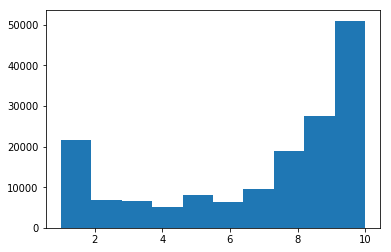

In [15]:
import matplotlib.pyplot as plt

plt.hist(df_drug_data.rating)

In [16]:
df_drug_data.condition.value_counts()

Birth Control                                   28788
Depression                                       9069
Pain                                             6145
Anxiety                                          5904
Acne                                             5588
Bipolar Disorde                                  4224
Insomnia                                         3673
Weight Loss                                      3609
Obesity                                          3568
ADHD                                             3383
Diabetes, Type 2                                 2554
Emergency Contraception                          2463
High Blood Pressure                              2321
Vaginal Yeast Infection                          2274
Abnormal Uterine Bleeding                        2096
Bowel Preparation                                1859
ibromyalgia                                      1791
Smoking Cessation                                1780
Migraine                    

In [20]:
df_drug_data_Dep = df_drug_data.where(df_drug_data.condition == 'Depression').dropna()
df_drug_data_Dep.year.astype(int)
df_drug_data_Dep.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,year
11,75612.0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,2017-03-09,54.0,2017.0
31,96233.0,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3.0,2011.0
44,121333.0,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,2016-04-27,3.0,2016.0
67,131909.0,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,2013-06-20,166.0,2013.0
81,171349.0,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",4.0,2017-01-13,15.0,2017.0


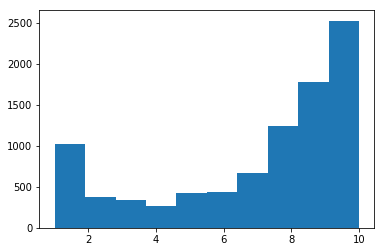

In [21]:
plt.hist(df_drug_data_Dep.rating);

In [22]:
df_drug_data_Dep.describe()

,Unnamed: 0,rating,usefulCount,year
count,9069.000000,9069.000000,9069.000000,9069.000000
mean,132679.891940,7.099460,50.602933,2013.372919
std,60782.523471,3.101117,58.760183,2.733631
min,870.000000,1.000000,0.000000,2008.000000
25%,89503.000000,5.000000,17.000000,2011.000000
50%,131747.000000,8.000000,33.000000,2014.000000
75%,183275.000000,10.000000,65.000000,2016.000000
max,232218.000000,10.000000,1291.000000,2017.000000


In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval [{:.2}, {:.2}]".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [26]:
confidence_interval(df_drug_data_Dep.rating)

(7.099459697871871, 7.035626808217171, 7.163292587526571)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
df = pd.read_csv('drugsComTrain_raw.tsv', na_values=" ?")
print(df.shape)
df.head()

In [34]:
print(df_drug_data.shape)
df_drug_data.head()

(161297, 8)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,2016


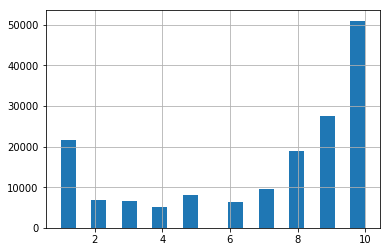

In [36]:
df_drug_data['rating'].hist(bins=20);

In [35]:
df_drug_data.describe(exclude='number')

,drugName,condition,review,date
count,161297,160398,161297,161297
unique,3436,884,112329,3579
top,Levonorgestrel,Birth Control,"""Good""",2016-03-01 00:00:00
freq,3657,28788,33,146
first,NaN,NaN,NaN,2008-02-24 00:00:00
last,NaN,NaN,NaN,2017-12-12 00:00:00


In [0]:
import matplotlib
import matplotlib.pyplot as plt


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)